Sources: [Original Research](https://cs.stanford.edu/people/jcjohns/eccv16/)
[Python Implementation](https://github.com/lengstrom/fast-style-transfer)

- Combines two approaches:
    - Calculating per-pixel loss between output & ground-truth images
    - Perceptual loss functions based on high-level features extracted from pretrained networks

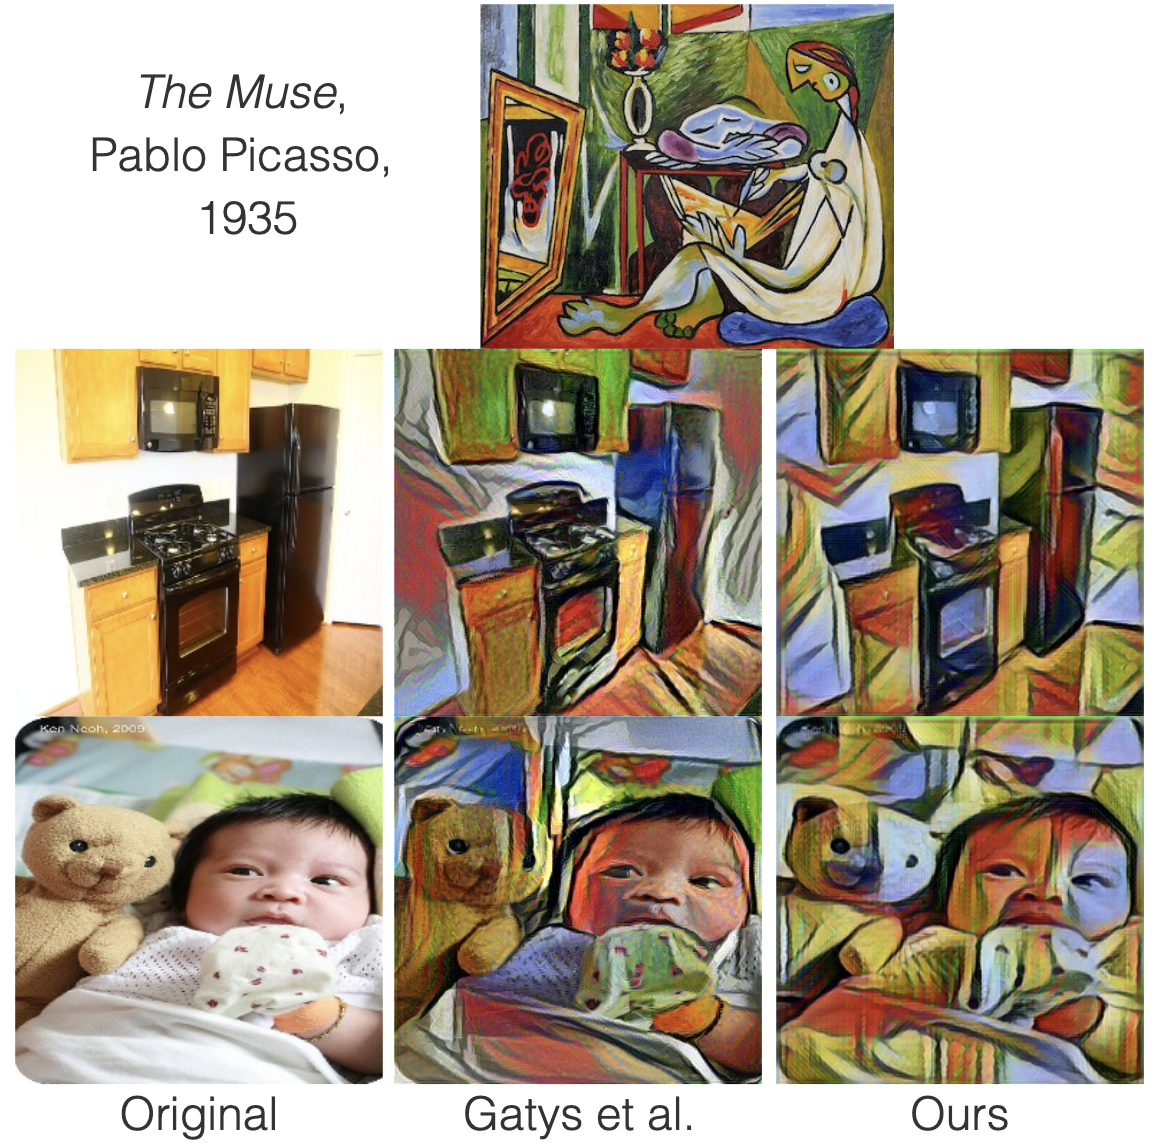
This method appears to capture the style more effectively

In [1]:
from helperFunctions import transform, vgg
from helperFunctions.utils import save_img, get_img, exists, list_files

import os
import scipy.misc
import tensorflow as tf
import numpy as np
from collections import defaultdict
import time
import json
import subprocess

files = list_files(in_path)oo
full_in = ['list of inpath + files']
full_out = ['list of outpath + files']
if opts.allow_different_dimensions:
    ffwd_different_dimensions(full_in, full_out, opts.checkpoint_dir, 
            device_t=opts.device, batch_size=opts.batch_size)
else :
    ffwd(full_in, full_out, opts.checkpoint_dir, device_t=opts.device,
            batch_size=opts.batch_size)

In [2]:
def ffwd(data_in, paths_out, checkpoint_dir, device_t='/gpu:0'):
    X = np.expand_dims(get_img(data_in), axis=0)

    g = tf.Graph()
    soft_config = tf.ConfigProto(allow_soft_placement=True)
    soft_config.gpu_options.allow_growth = True
    with g.as_default(), g.device(device_t), \
            tf.Session(config=soft_config) as sess:

        img_placeholder = tf.placeholder(tf.float32, shape=X.shape,
                                         name='img_placeholder')

        # load model, transform image
        preds = transform.net(img_placeholder)
        saver = tf.train.Saver()
        saver.restore(sess, checkpoint_dir)
        _preds = sess.run(preds, feed_dict={img_placeholder:X})
        
        # save
        save_img(paths_out, _preds[0])

In [3]:
def verify():
    """temporary helper function to ensure i refactor without error"""
    new = get_img('output/stonearch.jpg')
    old = get_img('output/stonearch.old.jpg')
    if np.all(new == old):
        os.system("mv output/stonearch.jpg output/stonearch.old.jpg")
    else:
        print("Different")

In [4]:
data_in = 'data/content/stonearch.jpg'
paths_out = 'output/stonearch.jpg'
checkpoint_dir = 'models/rain-princess.ckpt'

ffwd(data_in, paths_out, checkpoint_dir, device_t='/gpu:0')
verify()

INFO:tensorflow:Restoring parameters from models/rain-princess.ckpt
